In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  # default is ‘last_expr’

%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
from collections import defaultdict

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

*No longer used. Please see notebook 2 for mapping from Class_WCS_202004 to the coarser set of classes.*

## Originally provided labels

Re-compiled the WCS labels on 2020 April 21 to mark "seasonal savanna" as its own category, which WCS previously lumped into "seasonally flooded savanna". 

In [3]:
# legend for the labels, with the corresponding WCS classes appended as a column manually
legend_path = '/MSOneDrive/AI4Earth/LandUse/WCS Colombia/classes_list/LULC_legend_w_WCS_classes.xlsx'
original_legend = pd.read_excel(legend_path)

# WCS provided this mapping to describe how classes they're interested in map to the original LULC classes,
# and which new classes they would like
map_path = '/MSOneDrive/AI4Earth/LandUse/WCS Colombia/classes_list/LULC_classes.xlsx'
original_map = pd.read_excel(map_path)

In [4]:
len(original_legend)
original_legend

50

,Raster_val,LULC_spanish,LULC_english,Class_WCS,Class_WCS_202004
0,1,1.1.1. Tejido urbano continuo,Continuous urban network,Urban,Urban
1,2,1.1.2. Tejido urbano discontinuo,Discontinuous urban network,Urban,Urban
2,3,1.2.1. Zonas industriales o comerciales,Industrial or comercial zones,Urban,Urban
3,4,"1.2.2. Red vial, ferroviaria y terrenos asociados","Roads, rails and associated terrains",Infrastructure,Infrastructure
4,5,1.2.4. Aeropuertos,Airports,Infrastructure,Infrastructure
5,6,1.3.1. Zonas de extraccion minera,Mining zones,Mining,Mining
6,7,1.4.2. Instalaciones recreativas,Recreation zones,Urban,Urban
7,8,2.1.1. Otros cultivos transitorios,Other temporary crops,Other temporary crops,Other temporary crops
8,9,2.1.2. Cereales,Cereals,Other temporary crops,Other temporary crops
9,10,2.1.4. Hortalizas,Vegetables,Other temporary crops,Other temporary crops


In [5]:
original_map

,Class_WCS,LULClegend,Comments
0,Urban,Continuous urban network,NaN
1,Urban,Discontinuous urban network,NaN
2,Urban,Industrial or comercial zones,NaN
3,Urban,Recreation zones,NaN
4,Infrastructure,"Roads, rails and associated terrains, Airports",NaN
5,Mining,Mining zones,NaN
6,Palm oil,Palm oil,NaN
7,Rice,Rice,There are two types of rice production in the ...
8,Soy/corn,NaN,Rotating between soy and corn is common. Also ...
9,Sugar cane,NaN,Industrial production of sugar cane for biofue...


## Tidying up the labels

### Net new classes to be added via the interactive tool

In [6]:
new_classes = original_map[pd.isna(original_map.LULClegend)]

In [7]:
list(new_classes.Class_WCS)

['Soy/corn', 'Sugar cane', 'Cocoa', 'Morichales']

Morichales - Moriche palm

### Consolidate WCS classes that can be mapped to LULC classes

In [8]:
wcs_name_to_num = {}

for i_row, row in original_legend.iterrows():
    wcs_name = row.Class_WCS_202004  # 2020 April re-run
    if wcs_name not in wcs_name_to_num:
        wcs_name_to_num[wcs_name] = len(wcs_name_to_num) + 1

In [9]:
len(wcs_name_to_num)

33

In [10]:
len(set(original_map.Class_WCS))

34

In [11]:
set(original_map.Class_WCS) - set(wcs_name_to_num.keys())

# changed Gallery forests to singular form

{'Cocoa', 'Gallery forests', 'Morichales', 'Soy/corn', 'Sugar cane'}

In [12]:
set(wcs_name_to_num.keys()) - set(original_map.Class_WCS)

{'Gallery forest',
 'Permanent herbaceous crops',
 'Seasonal savanna',
 'Unavailable'}

"Sugar cane" could be "Permanent herbaceous crops" - WCS. 

### Create various name to numerical label maps

In [13]:
lulc_name_to_num = {}
for i_row, row in original_legend.iterrows():
    lulc_name_to_num[row.LULC_english] = row.Raster_val

In [14]:
lulc_num_to_wcs_num = {}

for i_row, row in original_legend.iterrows():
    lulc_num_to_wcs_num[row.Raster_val] = wcs_name_to_num[row.Class_WCS_202004]  # 2020 April re-run

In [15]:
lulc_name_to_wcs_name = {}
for i_row, row in original_legend.iterrows():
    lulc_name_to_wcs_name[row.LULC_english] = row.Class_WCS_202004  # 2020 April re-run

In [16]:
lulc_num_to_name = {v: k for k, v in lulc_name_to_num.items()}

In [17]:
wcs_num_to_name = {v: k for k, v in wcs_name_to_num.items()}

In [18]:
wcs_num_to_name

{1: 'Urban',
 2: 'Infrastructure',
 3: 'Mining',
 4: 'Other temporary crops',
 5: 'Permanent herbaceous crops',
 6: 'Other permanent shrubby crops',
 7: 'Other permanent arboreal crops',
 8: 'Intensive livestock',
 9: 'Silvopastoral livestock',
 10: 'Secondary herbaceous vegetation',
 11: 'Other agricultural areas',
 12: 'Dense forest',
 13: 'Open forest',
 14: 'Fragmented forest',
 15: 'Gallery forest',
 16: 'Forestry crops',
 17: 'Savanna',
 18: 'Shrubland',
 19: 'Secondary shrubby/arboreal vegetation',
 20: 'Sandy areas',
 21: 'Rocks',
 22: 'Degraded and bare land',
 23: 'Burnt zones',
 24: 'Glaciars and snow zones',
 25: 'Swamp',
 26: 'Rivers',
 27: 'Lakes, lagoons, and natural cienaga',
 28: 'Artificial water bodies',
 29: 'Unavailable',
 30: 'Rice',
 31: 'Palm oil',
 32: 'Seasonal savanna',
 33: 'Seasonally flooded savanna'}

In [19]:
wcs_num_to_color = {
  "0": "black",
  "1": "lightgray",
  "2": "lightsteelblue",
  "3": "sienna",
  "4": "lavender",
  "5": "teal",
  "6": "lightsalmon",
  "7": "olive",
  "8": "salmon",
  "9": "sandybrown",
  "10": "goldenrod",
  "11": "darkkhaki",
  "12": "darkseagreen",
  "13": "mediumseagreen",
  "14": "lightgreen",
  "15": "limegreen",
  "16": "tan",
  "17": "gold",
  "18": "orange",
  "19": "hotpink",
  "20": "blanchedalmond",
  "21": "slategray",
  "22": "rosybrown",
  "23": "firebrick",
  "24": "powderblue",
  "25": "darkolivegreen",
  "26": "dodgerblue",
  "27": "deepskyblue",
  "28": "darkturquoise",
  "29": "whitesmoke",
  "30": "pink",
  "31": "plum",
  "32": "khaki",
  "33": "thistle"
 }

In [20]:
maps = {
    'wcs_name_to_num': wcs_name_to_num,
    'wcs_num_to_name': wcs_num_to_name,
    'wcs_num_to_color': wcs_num_to_color,
    
    'lulc_name_to_num': lulc_name_to_num,
    'lulc_num_to_lulc_name': lulc_num_to_name,
    
    # mapping between the two sets of classes
    'lulc_num_to_wcs_num': lulc_num_to_wcs_num,
    'lulc_name_to_wcs_name': lulc_name_to_wcs_name
}

Note that when an int is the value of the key, when serialized as a json, it will be cast to a str.

In [21]:
with open('../constants/class_lists/lulc_wcs_label_maps.json', 'w') as f:
    json.dump(maps, f, indent=4)

`"0": "Empty of data"` entry is then manually added to `wcs_num_to_name`
and category 29 is changed from `Unavailable` to `Label unavailable`

In [22]:
with open('../constants/class_lists/lulc_wcs_label_maps.json') as f:
    reloaded = json.load(f)

## Add WCS classes to the label polygon geojson

In [23]:
# copied to and from the blob container
label_path = '/data/WCS_land_use/Landuse_shape/raw/Updated.shp'
out_label_path = '/data/WCS_land_use/Landuse_shape/derived/landuse.shp'

In [24]:
landuse_shape = gpd.read_file(label_path)
landuse_shape.Landuse = landuse_shape.Landuse.astype(int)

In [25]:
landuse_lean = landuse_shape.drop(labels=['CAMBIO', 'CONFIABILI', 'INSUMO', 'CODIGO', 'LEYENDA3N'], axis=1)

In [26]:
landuse_lean.head(2)

,OBJECTID,AREA_HA,Landuse,geometry
0,33319,39.487936,24,"POLYGON ((-74.53707 1.91269, -74.53678 1.91254..."
1,33543,155.825900,24,"POLYGON ((-74.53191 1.88832, -74.53191 1.88832..."


In [27]:
unique_check = landuse_lean.Landuse.unique()
len(unique_check)

50

In [28]:
landuse_wcs = landuse_lean.Landuse.map(lambda x: reloaded['lulc_num_to_wcs_num'][str(x)])

In [30]:
landuse_wcs.head(5)

0    14
1    14
2    12
3     8
4     8
Name: Landuse, dtype: int64

In [31]:
landuse_lean = landuse_lean.assign(Landuse_WCS=landuse_wcs)

In [32]:
landuse_lean.sample(10)

,OBJECTID,AREA_HA,Landuse,geometry,Landuse_WCS
21068,136257,113.604924,49,"POLYGON ((-72.72576 3.09846, -72.72572 3.09845...",33
39655,208998,56.680848,49,"POLYGON ((-68.89608 4.04936, -68.89608 4.04936...",33
77353,226395,2233.968416,27,"MULTIPOLYGON (((-68.14463 5.43441, -68.14335 5...",17
73183,199463,40.033178,25,"MULTIPOLYGON (((-69.98859 5.95270, -69.98858 5...",15
35361,196689,1048.995906,25,"POLYGON ((-70.84058 4.42214, -70.84062 4.42213...",15
33319,79841,86.381884,22,"POLYGON ((-68.49605 2.92538, -68.49673 2.92501...",12
70191,198402,40.573647,27,"POLYGON ((-71.08660 5.72511, -71.08658 5.72508...",17
86036,200622,262.092654,35,"POLYGON ((-70.45149 5.29464, -70.45148 5.29457...",25
48892,55828,314.834832,45,"POLYGON ((-73.07525 5.36454, -73.07499 5.36433...",8
8140,56987,59.670929,29,"MULTIPOLYGON (((-72.96452 2.84847, -72.96397 2...",19


In [33]:
%%time

# save to shape file is about 1.08 GB; saving as geojson would be nearly 3 BG

landuse_lean.to_file(out_label_path)

CPU times: user 9min 33s, sys: 10.7 s, total: 9min 44s
Wall time: 10min 6s


## Class distribution

In [34]:
wcs_class_to_area = defaultdict(float)
for i_row, row in landuse_lean.iterrows():
    wcs_class_to_area[row.Landuse_WCS] += row.AREA_HA

In [35]:
total_area = sum(wcs_class_to_area.values())  # hectares
total_area

61068324.05419071

In [36]:
landuse_num = []
landuse_name = []
areas = []
landuse_color = []

for num, area in wcs_class_to_area.items():
    landuse_num.append(num)
    landuse_name.append(wcs_num_to_name[num])  # the map is the in-memory copy so keys are ints still
    areas.append(area)
    landuse_color.append(wcs_num_to_color[str(num)])
    
data = {
    'landuse_num': landuse_num,
    'landuse_name': landuse_name,
    'areas': areas,
    'landuse_color': landuse_color
}
df = pd.DataFrame.from_dict(data)

In [37]:
df.head(5)

,landuse_num,landuse_name,areas,landuse_color
0,14,Fragmented forest,7.092083e+05,lightgreen
1,12,Dense forest,2.428977e+07,darkseagreen
2,8,Intensive livestock,5.355483e+06,salmon
3,10,Secondary herbaceous vegetation,2.220047e+05,goldenrod
4,11,Other agricultural areas,1.927267e+06,darkkhaki


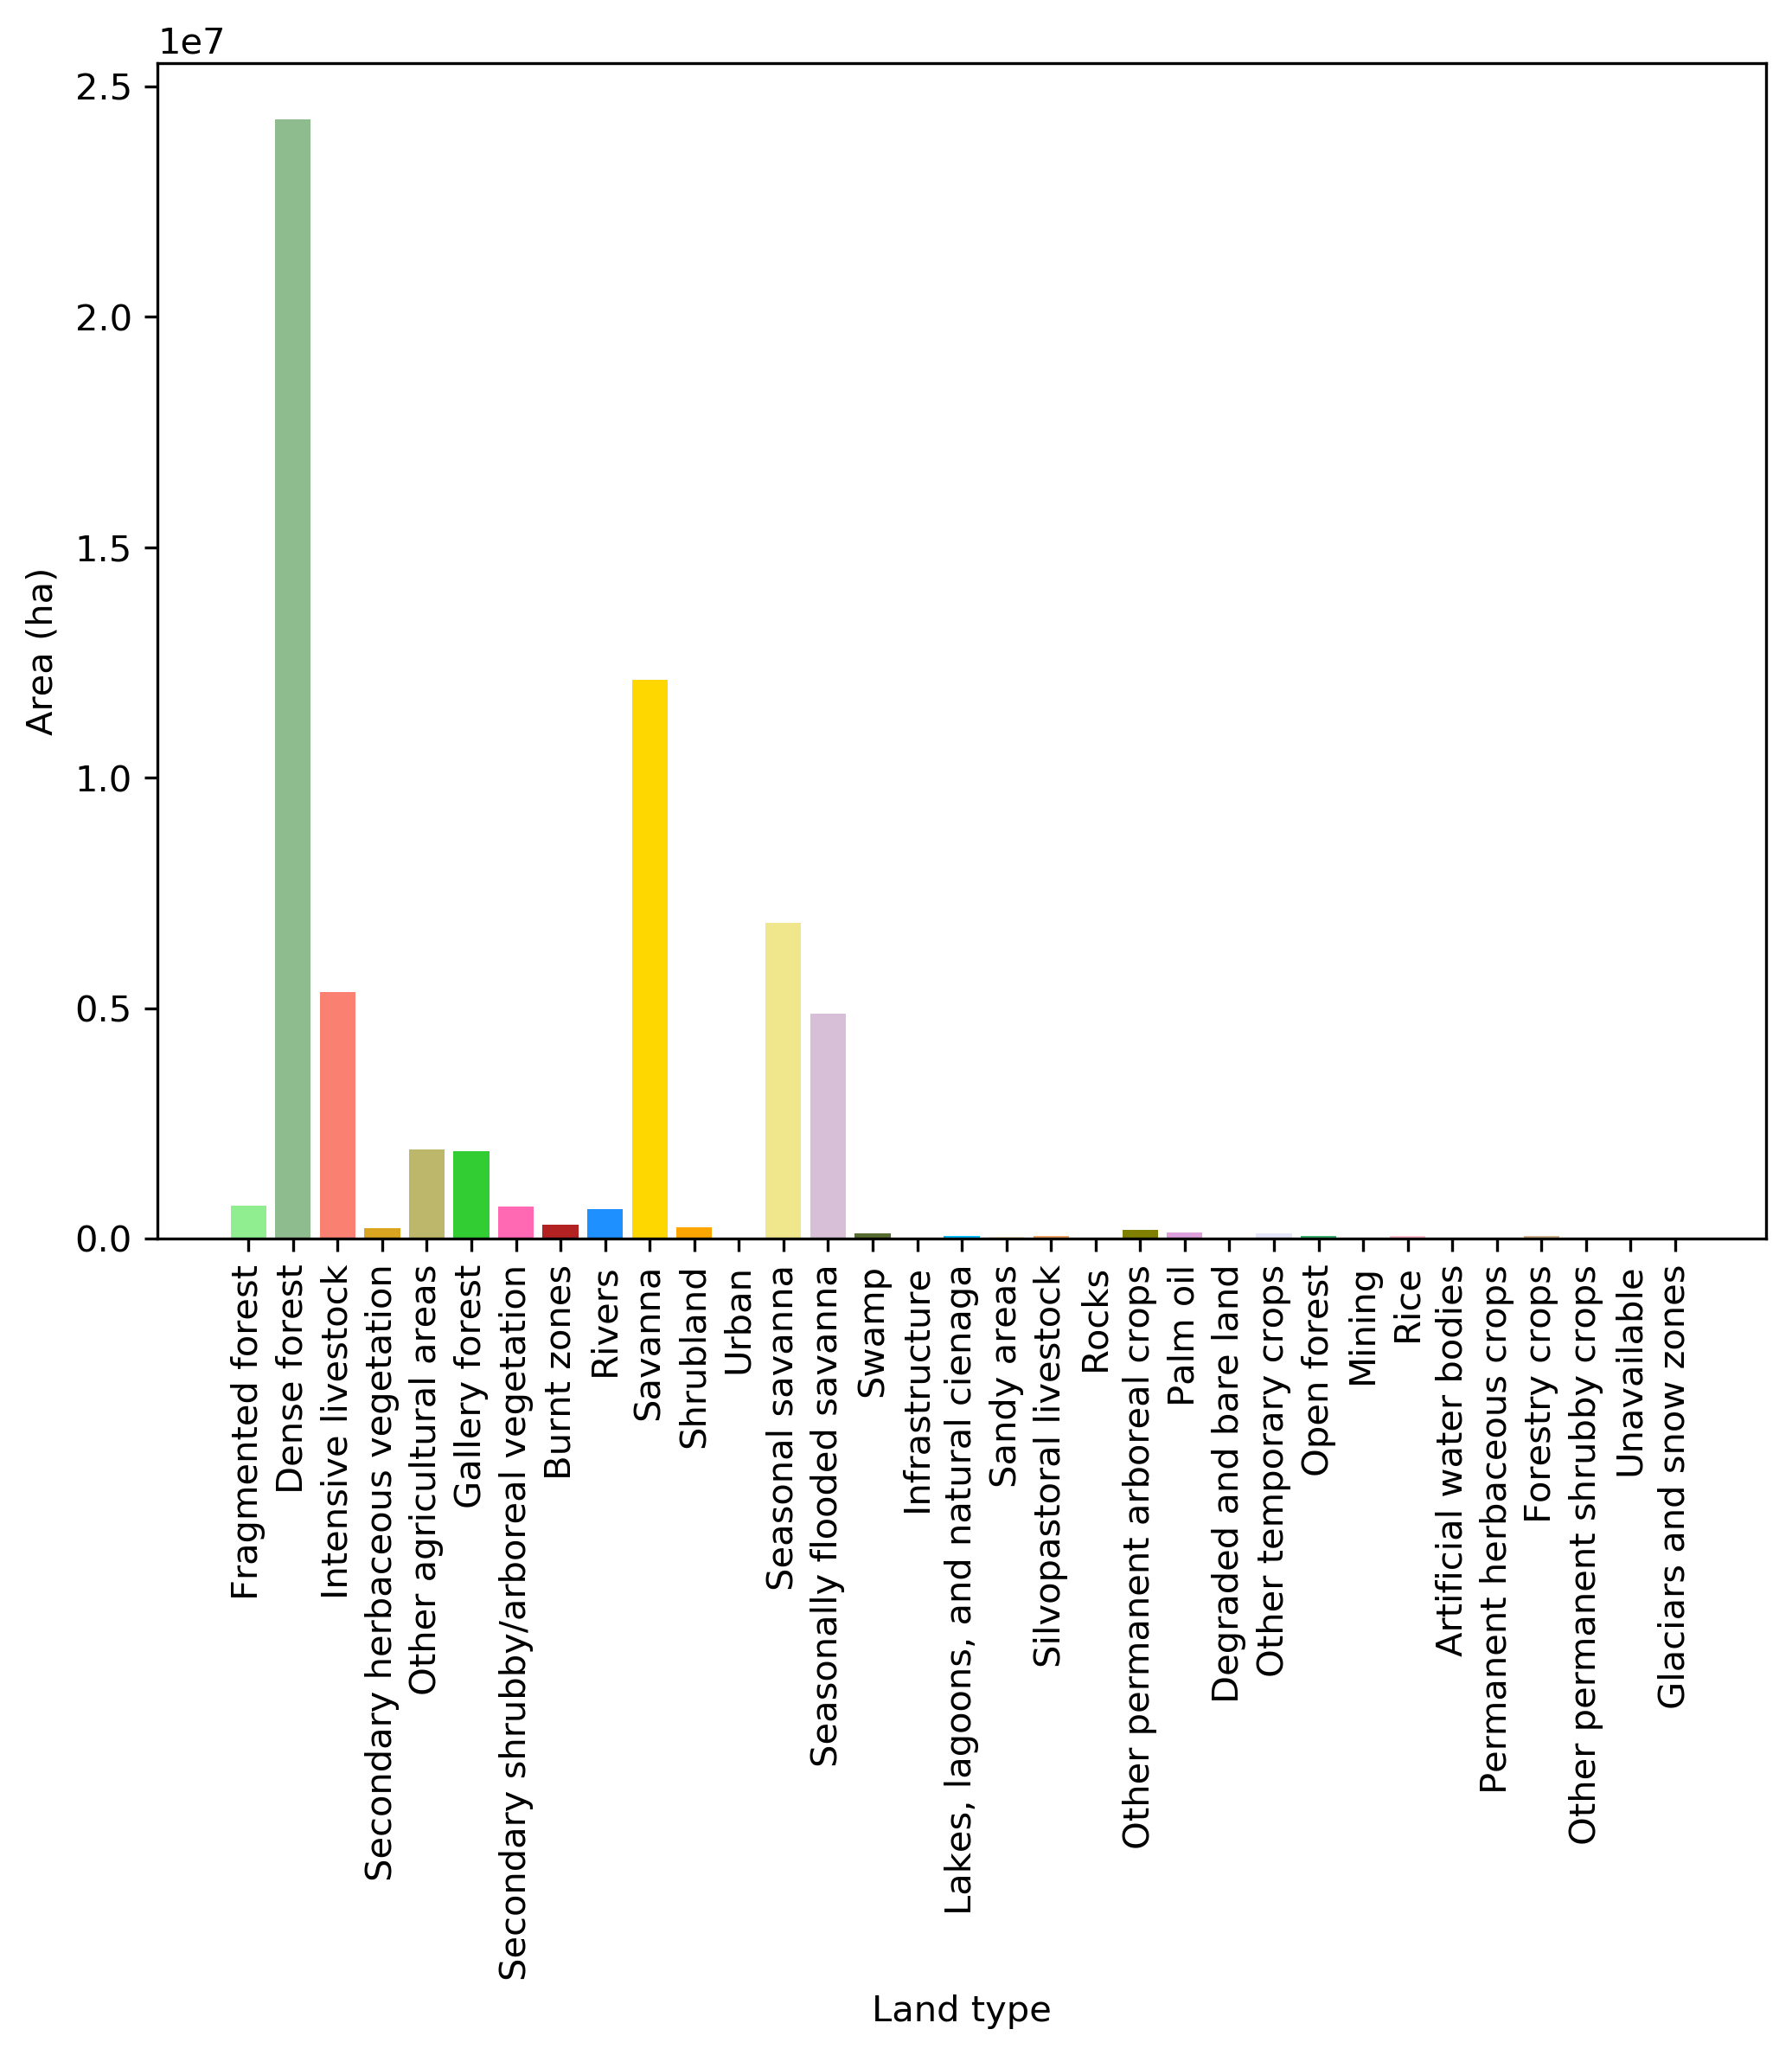

In [42]:
# TODO sort this

# can't use df.plot because of individual bar coloring

fig = plt.figure(figsize=(8, 6), dpi=300)
ax = plt.subplot(111)

_ = plt.bar(df.landuse_name, df.areas, color=df.landuse_color)

_ = plt.xticks(rotation=90)

_ = ax.set_ylabel('Area (ha)')
_ = ax.set_xlabel('Land type')

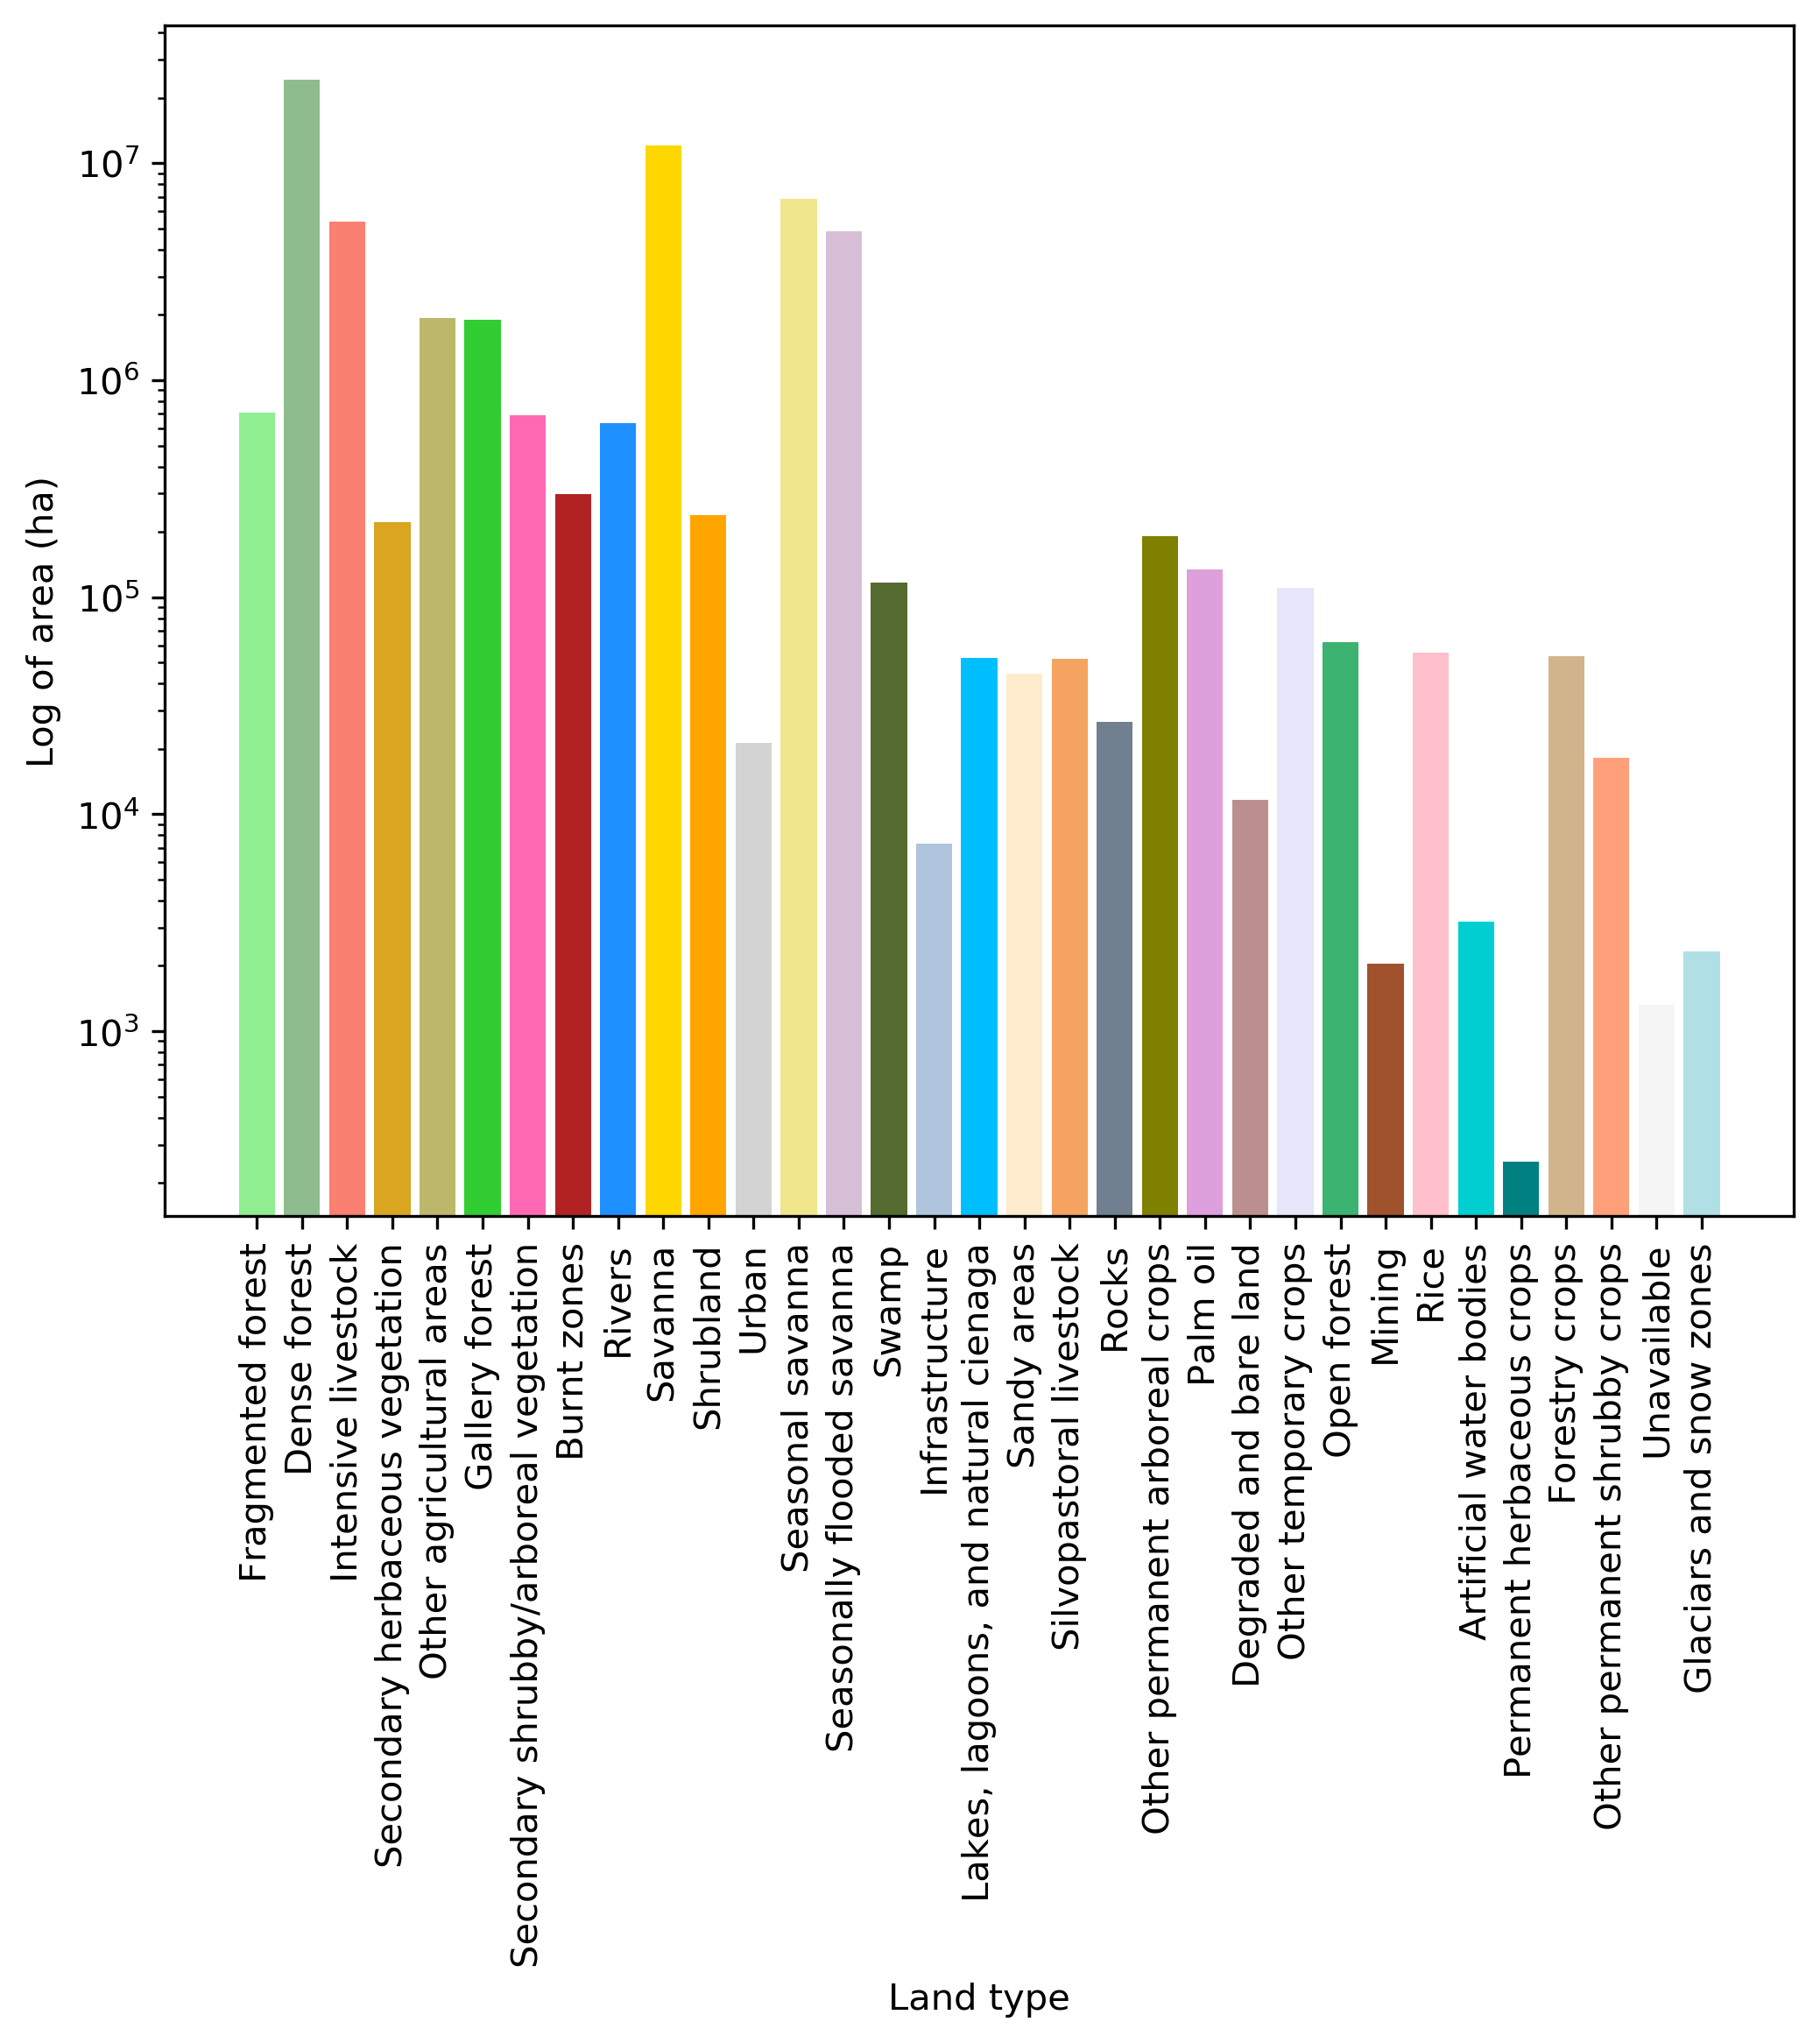

In [43]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = plt.subplot(111)

_ = plt.bar(df.landuse_name, df.areas, color=df.landuse_color)

_ = plt.xticks(rotation=90)

_ = ax.set_yscale('log')

_ = ax.set_ylabel('Log of area (ha)')
_ = ax.set_xlabel('Land type')